# Set up the environment

In [1]:
!git clone https://github.com/WouterBant/diffusion-augmented-pixelsplat.git

fatal: destination path 'diffusion-augmented-pixelsplat' already exists and is not an empty directory.


⚡️ Tip	Check organization access: https://github.com/settings/connections/applications/c7457225b242a94d60c6



In [2]:
%cd diffusion-augmented-pixelsplat

/teamspace/studios/this_studio/diffusion-augmented-pixelsplat


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
%pip install -q -r installation_jobs/requirements.txt

Note: you may need to restart the kernel to use updated packages.


Add a shortcut in your own Google Drive account to the Re10k sample data shared by the authors:
https://drive.google.com/drive/folders/1joiezNCyQK2BvWMnfwHJpm2V77c7iYGe

(This is done because it is easier to copy using the Google Drive - Colab integration than downloading from the public link, as Google Drive gives multiple HTML popups/warnings in that case that you'd need to process)

In [4]:
# Give permission when asked to access your drive from this notebook
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# Download the empty folder that's currently checked into out repo, but which lacks the .torch files
!rm -rf "datasets/re10k"

# Copy the sample data from Google Drive to the local machine
!cp "/content/drive/MyDrive/dataset_subsets/re10k_subset.zip" "datasets/"

# Unzip
!unzip "datasets/re10k_subset.zip" -d "datasets"

# Rename to re10k
!mv "datasets/re10k_subset"  "datasets/re10k/"

Archive:  datasets/re10k_subset.zip
   creating: datasets/re10k_subset/
   creating: datasets/re10k_subset/train/
  inflating: datasets/re10k_subset/train/000002.torch  
  inflating: datasets/re10k_subset/train/000000.torch  
  inflating: datasets/re10k_subset/train/index.json  
  inflating: datasets/re10k_subset/train/000001.torch  
   creating: datasets/re10k_subset/test/
  inflating: datasets/re10k_subset/test/000001.torch  
  inflating: datasets/re10k_subset/test/index.json  
  inflating: datasets/re10k_subset/test/000000.torch  
  inflating: datasets/re10k_subset/test/000002.torch  


# Load and export images

In [6]:
from src.dataset.dataset_re10k import DatasetRE10k
from src.config import load_typed_root_config
from src.dataset.data_module import DataModule
from src.global_cfg import set_cfg
from hydra import compose, initialize_config_dir
from omegaconf import OmegaConf
import hydra
from torchvision.transforms import functional as F
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm.autonotebook import tqdm, trange

In [7]:
# All configs are stored in Hydra, a config management system, so we need to load these
# to instantiate classes like the data loader.
with initialize_config_dir(version_base=None, config_dir=hydra.utils.to_absolute_path("config")):
    cfg_dict = compose(
        config_name="main.yaml", return_hydra_config=True, overrides=[]
    )
    # print(OmegaConf.to_yaml(cfg))

cfg = load_typed_root_config(cfg_dict)
set_cfg(cfg)

  warnings.warn(msg, UserWarning)



In [19]:
# We're only exporting files here, not training, so set num_workers to 1 to avoid weird multiprocessing errors
cfg.data_loader.train.num_workers = 1
cfg.data_loader.val.num_workers = 1
cfg.data_loader.test.num_workers = 1

1


In [8]:
# Instantiate the DataModule based on the configs and data
data_module = DataModule(
        cfg.dataset,
        cfg.data_loader,
)

In [9]:
!rm -rf {target_dir}

In [20]:
# Export all test images into a folder
target_dir = Path("datasets/re10k/re10k_train_context_images")
target_dir.mkdir(exist_ok=True)

for data in tqdm(data_module.train_dataloader()):
    # print(data.keys()) # ['context', 'target', 'scene']

    # context/image has a shape of [1, 2, 3, 180, 320], so if I understand correctly
    # context is a pair of images that is used for creating the reconstruction
    # print(data["context"].keys()) # ['extrinsics', 'intrinsics', 'image', 'near', 'far', 'index']

    # target/image has a shape of [1, 46, 3, 180, 320], so I assume target is a set of other images
    # from the same video that we try to reconstruct, based on the two images in context
    # print(data["target"].keys()) # ['extrinsics', 'intrinsics', 'image', 'near', 'far', 'index']

    # the scene id I presume
    # print(len(data["scene"])) # a single scene in a given batch, at least for the test set
    # assert len(data["scene"]) == 1
    # scene_id = data["scene"][0]

    image_group = "context" # context or target, save the context images for now
    images = data[image_group]["image"]
    # print(images.shape)
    for scene_num in range(images.shape[0]):
        for image_num in range(images[scene_num].shape[0]):
            scene_id = data["scene"][scene_num]
            pil_image = F.to_pil_image(images[scene_num, image_num])
            fn = f"{scene_id}_{image_group}_{image_num}.png"
            print(fn)
            pil_image.save(target_dir / fn, "PNG", compress_level=0) # save with lossless compression
            # plt.imshow(pil_image)
            # plt.show()
            # break
        # break
    # break

  0%|          | 0/10 [00:00<?, ?it/s]

  self.pid = os.fork()



47c676b06a3833ab_context_0.png
47c676b06a3833ab_context_1.png
3fd762f6877a9c15_context_0.png
3fd762f6877a9c15_context_1.png
079f05d5a14d5034_context_0.png
079f05d5a14d5034_context_1.png
7d747dbeeac960e6_context_0.png
7d747dbeeac960e6_context_1.png
39efe3569042d482_context_0.png
39efe3569042d482_context_1.png
48eb62d05fc8104c_context_0.png
48eb62d05fc8104c_context_1.png
904340756df15268_context_0.png
904340756df15268_context_1.png
57f635805bc981dc_context_0.png
57f635805bc981dc_context_1.png
38b78311ed6b92e2_context_0.png
38b78311ed6b92e2_context_1.png
8f56fb936a827d6d_context_0.png
8f56fb936a827d6d_context_1.png
3a4e08a3f02ad769_context_0.png
3a4e08a3f02ad769_context_1.png
e4774e728791dc20_context_0.png
e4774e728791dc20_context_1.png
93b36a54151e085e_context_0.png
93b36a54151e085e_context_1.png
710fcd11025c6ce5_context_0.png
710fcd11025c6ce5_context_1.png
67bd3eefd07e6042_context_0.png
67bd3eefd07e6042_context_1.png
a1d5d19d06c605ef_context_0.png
a1d5d19d06c605ef_context_1.png
bb921538

In [21]:
!cp -r {target_dir} "/content/drive/MyDrive/Shared/"

# Generate masks and diffuse images

In [ ]:
%pip install -q -U diffusers datasets transformers accelerate ftfy pyarrow==9.0.0

In [ ]:
import hashlib
from diffusers import AutoPipelineForInpainting, StableDiffusionInpaintPipeline
import torch
from PIL import Image
from pathlib import Path
import numpy as np
import math
from diffusers.utils import load_image, make_image_grid
from tqdm.autonotebook import tqdm

def generate_mask(image_name, img_width, img_height, mask_width, mask_height=-1, random_num=0):
    """
    Generate a mask of a given width for an image of a given size.

    The mask is random but idempotent. This means that different images get different random mask,
    but the same image gets the same mask.

    :param image_name: Name of the image, used for generating a stable random mask
    :param img_width: Image width
    :param img_height: Image height
    :param mask_width: Mask width
    :param mask_height: Mask height. If -1 then a height is automatically calculated to make the mask aspect
        ratio equal to the image ratio.
    :param random_num: An optional random number that is used when generating the random mask. This can be used
        to generate different masks for the same image. It is advised to pass the samee number here for all images
        to make generation reproducible.
    """
    if mask_height == -1:
        # calculate a proportional mask height
        mask_height = math.floor(img_height / img_width * mask_width)
    mask_left = (int(hashlib.sha256((image_name + str(random_num)).encode()).hexdigest(), base=16)) % (img_width - mask_width)
    mask_top = (int(hashlib.sha256((image_name + str(random_num)).encode()).hexdigest(), base=16) + random_num) % (img_height - mask_height)
    return mask_left, mask_left + mask_width, mask_top, mask_top + mask_height

def get_masked_image(image_array, image_fn, mask_width, mask_height=-1, random_num=0):
    """ Get a masked version of an image. See generate_mask for meaning of the parameters.  """
    masked_image_array = image_array.copy()
    height, width, _ = image_array.shape
    mask_x0, mask_x1, mask_y0, mask_y1 = generate_mask(image_fn, width, height, mask_width, mask_height, random_num)
    # print(mask_x0, mask_x1, mask_y0, mask_y1)
    mask_array = np.zeros_like(image_array[:, :, 0])
    mask_array[mask_y0:mask_y1, mask_x0:mask_x1] = 1
    # image_array[mask_array] = 0 # I think this should work but I made a stupid mistake..?
    masked_image_array[mask_y0:mask_y1, mask_x0:mask_x1] = 0

    return masked_image_array, mask_array

Apply 3 different mask sizes to all test images, display and save the results to a folder

In [3]:
# Stable diffusion pipeline
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting",
    torch_dtype=torch.float16,
)
pipe.to("cuda")
pipeline_name = "sd2inpaint"

# Kandinsky pipeline
# pipe = AutoPipelineForInpainting.from_pretrained("kandinsky-community/kandinsky-2-2-decoder-inpaint", torch_dtype=torch.float16)
# pipe.enable_model_cpu_offload()
# pipeline_name = "kandinsky22inpaint"

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

0d4de33c6888a754_context_0.png


  0%|          | 0/50 [00:00<?, ?it/s]

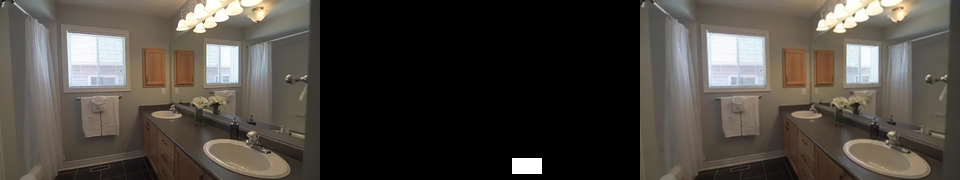

0d4de33c6888a754_context_0.png


  0%|          | 0/50 [00:00<?, ?it/s]

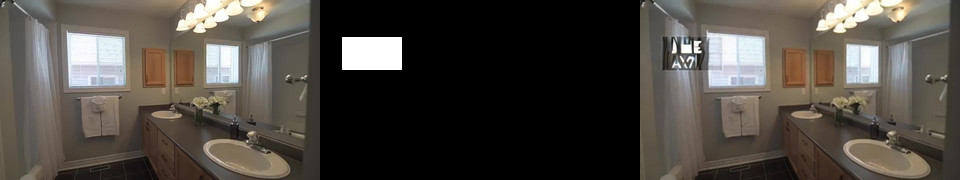

0d4de33c6888a754_context_0.png


  0%|          | 0/50 [00:00<?, ?it/s]

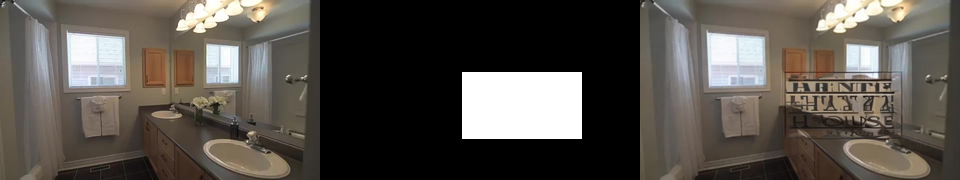

  0%|          | 0/3 [00:00<?, ?it/s]

57d25dafabb5a238_context_0.png


  0%|          | 0/50 [00:00<?, ?it/s]

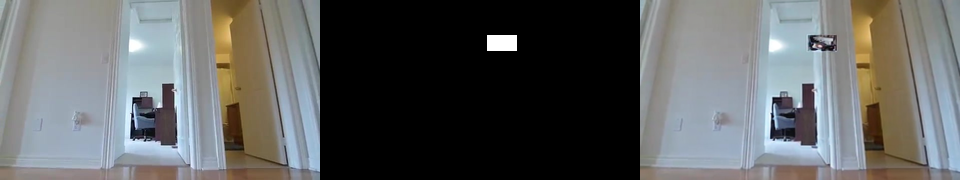

57d25dafabb5a238_context_0.png


  0%|          | 0/50 [00:00<?, ?it/s]

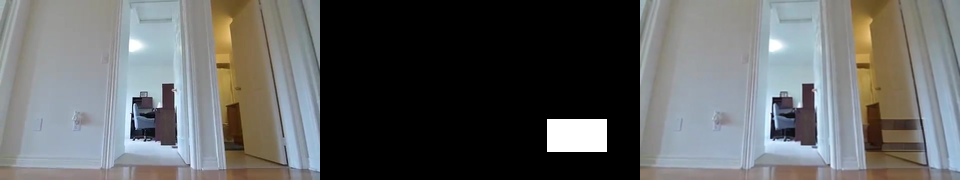

57d25dafabb5a238_context_0.png


  0%|          | 0/50 [00:00<?, ?it/s]

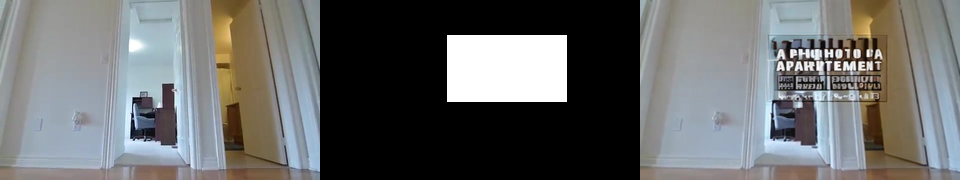

  0%|          | 0/3 [00:00<?, ?it/s]

6771a51bf0cfce7f_context_0.png


  0%|          | 0/50 [00:00<?, ?it/s]

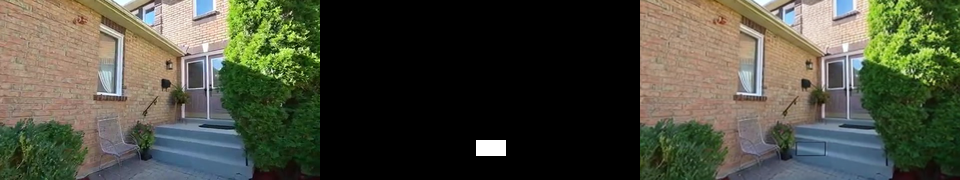

6771a51bf0cfce7f_context_0.png


  0%|          | 0/50 [00:00<?, ?it/s]

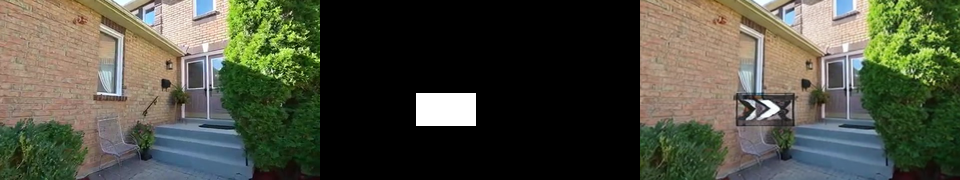

6771a51bf0cfce7f_context_0.png


  0%|          | 0/50 [00:00<?, ?it/s]

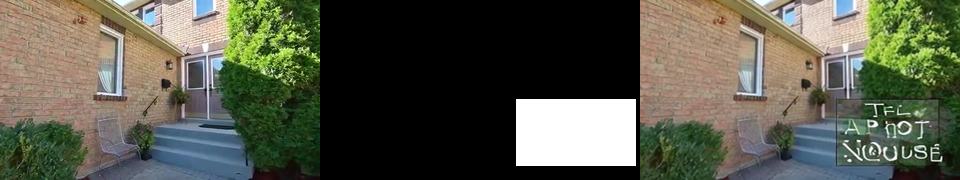

  0%|          | 0/3 [00:00<?, ?it/s]

57d25dafabb5a238_context_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

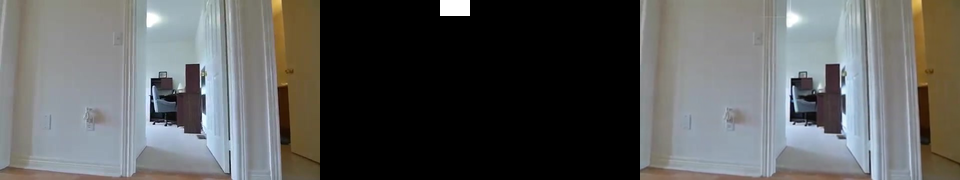

57d25dafabb5a238_context_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

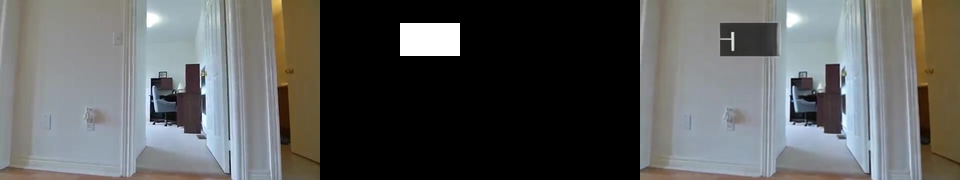

57d25dafabb5a238_context_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

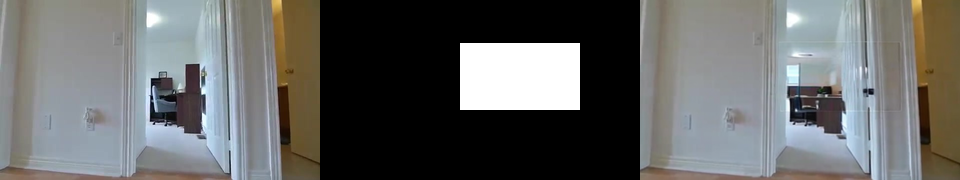

  0%|          | 0/3 [00:00<?, ?it/s]

5aca87f95a9412c6_context_0.png


  0%|          | 0/50 [00:00<?, ?it/s]

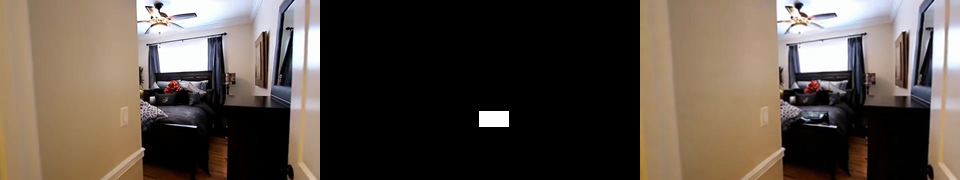

5aca87f95a9412c6_context_0.png


  0%|          | 0/50 [00:00<?, ?it/s]

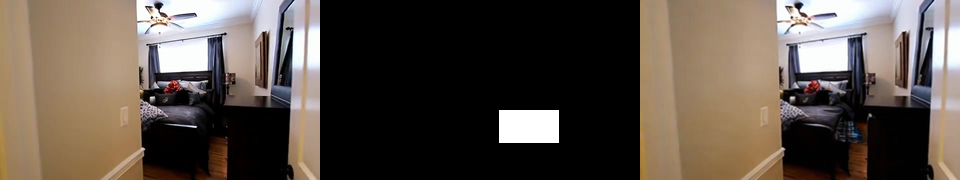

5aca87f95a9412c6_context_0.png


  0%|          | 0/50 [00:00<?, ?it/s]

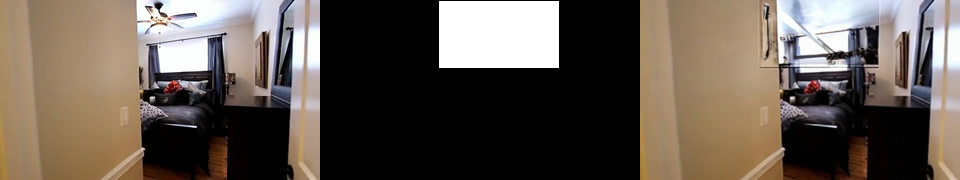

  0%|          | 0/3 [00:00<?, ?it/s]

5aca87f95a9412c6_context_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

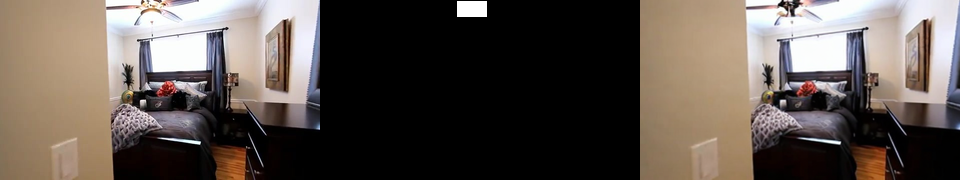

5aca87f95a9412c6_context_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

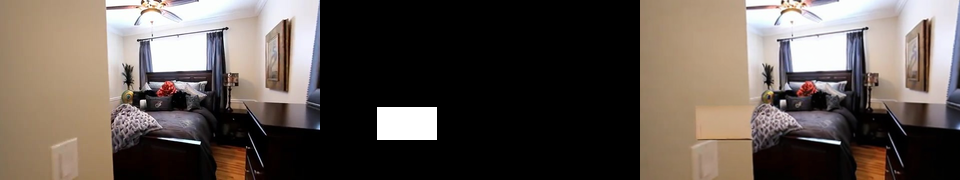

5aca87f95a9412c6_context_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

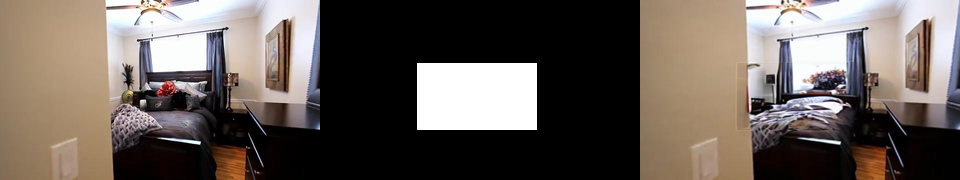

  0%|          | 0/3 [00:00<?, ?it/s]

bc95e5c7e357f1b7_context_0.png


  0%|          | 0/50 [00:00<?, ?it/s]

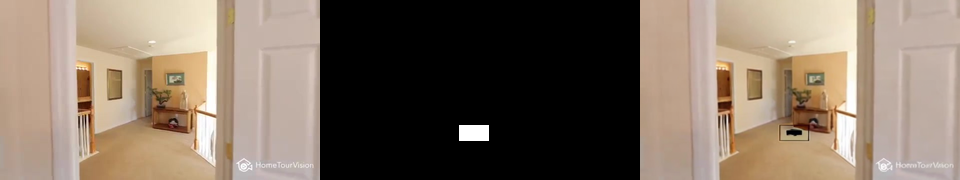

bc95e5c7e357f1b7_context_0.png


  0%|          | 0/50 [00:00<?, ?it/s]

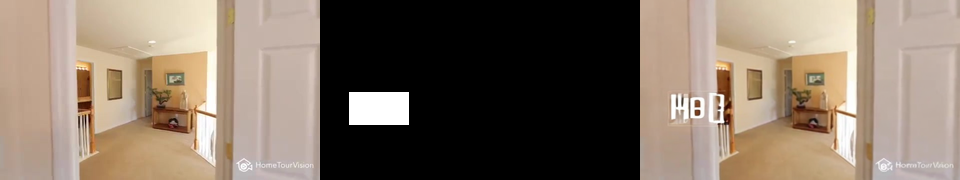

bc95e5c7e357f1b7_context_0.png


  0%|          | 0/50 [00:00<?, ?it/s]

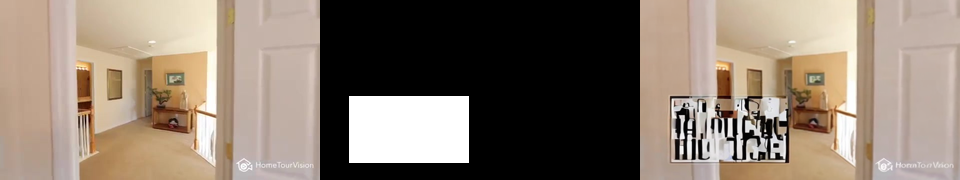

Stopping at 21 images


In [17]:
prompt = "A photo of an apartment or house"

# images_dir = Path("datasets/re10k/re10k_test_context_images/")
images_dir = Path("/content/drive/MyDrive/Shared/re10k_test_context_images/")
diff_images_dir = images_dir.with_stem("re10k_test_context_images_diff")

diff_images_dir.mkdir(exist_ok=True)

max_images = 20
num_images = 0
for image_path in tqdm(list(images_dir.glob("*.png"))):
    for mask_width in tqdm([30, 60, 120]):
        output_dir = diff_images_dir / f"{pipeline_name}_mask_width_{mask_width}"
        output_dir.mkdir(exist_ok=True)

        image_fn = Path(image_path.name)
        print(image_fn)
        image = Image.open(images_dir / image_fn)
        # display(image)
        image_array = np.asarray(image)
        height, width, _ = image_array.shape
        # FIXME: little trick: do not pass the last character of the image name, so the two related images get the same mask
        masked_image_array, mask_array = get_masked_image(image_array, str(image_fn)[:-2], mask_width=mask_width)
        masked_image = Image.fromarray(np.uint8(masked_image_array))

        # FIXME: originally I used a binary mask image. Then I wanted to try blurring, so I had to convert it to uint8.
        # However even if I use a very tiny blur of blur_factor=1, the generated results deviate completely from the original
        # image, instead of being more gradually blend together.
        mask_image = Image.fromarray(np.bool_(mask_array))
        # mask_image = Image.fromarray(np.uint8(mask_array) * 255)
        # mask_image = pipe.mask_processor.blur(mask_image, blur_factor=1)

        # display(masked_image)

        #image and mask_image should be PIL images.
        #The mask structure is white for inpainting and black for keeping as is
        diffused_image = pipe(
            prompt=prompt,
            image=masked_image,
            mask_image=mask_image,
            #width=width,
            #height = 184, # height=height, # FIXME both width and height must be divisible by 8, but 180 isn't
            # strength=0.5,
            guidance_scale=3.0
        ).images[0]
        diffused_image = diffused_image.resize((width, height)) # FIXME this shouldn't be necessary
        diffused_image.save(output_dir / image_fn.with_stem(image_fn.stem + f"_diffused"))
        mask_image.save(output_dir / image_fn.with_stem(image_fn.stem + f"_mask"))
        # display(diffused_image)

        grid_img = make_image_grid([image, mask_image, diffused_image], rows=1, cols=3)
        grid_img.save(output_dir / image_fn.with_stem(image_fn.stem + f"_grid"))
        display(grid_img)

        # not sure if this is really needed
        image.close()
        masked_image.close()
        mask_image.close()
        diffused_image.close()
        grid_img.close()

        num_images += 1

        if max_images and num_images > max_images:
            print(f"Stopping at {num_images} images")
            break
    if max_images and num_images > max_images:
        break

# LoRA on masked train images

Based on
- https://huggingface.co/docs/diffusers/en/training/lora

In [22]:
# They suggest loading and installing the latest diffusers versions from source, as the example scripts
# are updated. We should later figure out which version we use and stick to that
%cd ..
!git clone https://github.com/huggingface/diffusers
%cd diffusers
%pip install -q .
%cd examples/text_to_image
%pip install -q -r requirements.txt

/content
Cloning into 'diffusers'...
remote: Enumerating objects: 60329, done.
remote: Counting objects: 100% (277/277), done.
remote: Compressing objects: 100% (201/201), done.
remote: Total 60329 (delta 159), reused 128 (delta 66), pack-reused 60052
Receiving objects: 100% (60329/60329), 41.69 MiB | 12.25 MiB/s, done.
Resolving deltas: 100% (43902/43902), done.


In [25]:
# Interactive accelerate config. We don't use distributed training now and I'm not sure if we want to
# use reduced precision, so maybe just go with the default below?
!accelerate config
#from accelerate.utils import write_basic_config
#write_basic_config()


----------------------------------------------------------------------------------------------------In which compute environment are you running?
Please input a choice index (starting from 0), and press enter
 ➔  This machine
    AWS (Amazon SageMaker)

This machine
----------------------------------------------------------------------------------------------------Which type of machine are you using?
Please input a choice index (starting from 0), and press enter
 ➔  No distributed training
    multi-CPU
    multi-XPU
    multi-GPU
    multi-NPU
    multi-MLU
    TPU

No distributed training
Do you want to run your training on CPU only (even if a GPU / Apple Silicon / Ascend NPU device is available)? [yes/NO]:no
Do you wish to optimize your script with torch dynamo?[yes/NO]:no
Do you want to use DeepSpeed? [yes/NO]: no
What GPU(s) (by id) should be used for training on this machine as a comma-seperated list? [all]:0
----------------------------------------------------------------------

# Generate predictions on the training set

Add a shortcut from the author's Google Drive folder to your own so that you can access it from your mounted drive here. (I have it inside a Shared folder, it you don't then modify the copy path in the next cell.)
https://drive.google.com/drive/folders/1ZYInQyBHav979dH7arITG8Z-wTSR_Bkm

In [6]:
!mkdir "checkpoints"
!cp "/content/drive/MyDrive/Shared/checkpoints (camera-ready)/re10k.ckpt" "checkpoints/re10k.ckpt"

In [13]:
!python3 -m src.main +experiment=re10k mode=test test.data_loader="train" test.output_path="outputs/re10k_train_data" data_loader.train.batch_size=1 checkpointing.load=checkpoints/re10k.ckpt

error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu

In [14]:
!cp -r "outputs/re10k_train_data" "/content/drive/MyDrive/Shared/re10k_train_3dgs_predict"